cada segundo es un elemento del arreglo


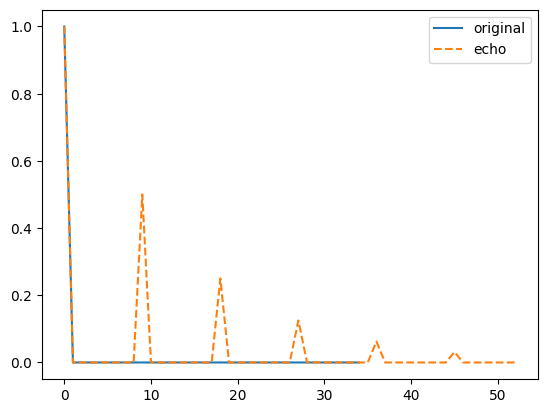

In [90]:
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from pydub.generators import Sine

#crear un array de amplitud personalizada
x = np.array([1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])


def echo(x, atenuation , delay, duration):
    
    delay = int(delay) + 1
    x_new = np.append(np.zeros(delay), x)
    x_new = np.append(x_new, np.zeros(int(duration*delay)))
    y = np.zeros(len(x_new)+delay)
    for i in range(delay, len(y)):
        y[i] = x_new[i-delay] + y[i - delay]*atenuation
    out = y[(2*delay):]
    return out

    #Ejemplo de aplicación
print("cada segundo es un elemento del arreglo")
#print("out", echo(x, 0.5,2))
plt.plot(x)
plt.plot(echo(x, 0.5,8,2), "--")

plt.legend(['original', 'echo'])

cada segundo es un elemento del arreglo
[-0.41108421  0.30566173 -0.22727482  0.16899023 -0.12565271  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


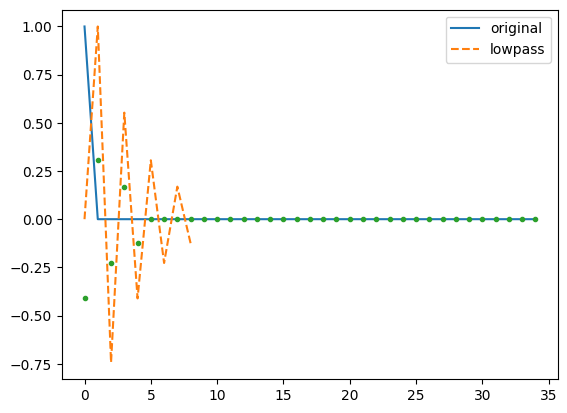

In [106]:
#pasa bajos
def low_pass_filter(fb):
    a1 = (np.tan(np.pi*fb/44100)-1)/(np.tan(np.pi*fb/44100)+1)
    n = int(np.ceil((4 * 44100) / fb))
    x = np.zeros(n)
    x[0] = 1
    y = np.zeros(len(x))
    for i in range(1, len(x)):
        y[i] = a1*x[i] + x[i-1] - a1*y[i-1]
    low_pass_output = y
    
    return low_pass_output

print("cada segundo es un elemento del arreglo")
plt.plot(x)
plt.plot(low_pass_filter(20000), "--")

plt.legend(['original', 'lowpass'])

print(np.convolve(x, low_pass_filter(20000), 'same'))
plt.plot(np.convolve(x, low_pass_filter(20000), 'same'), ".")

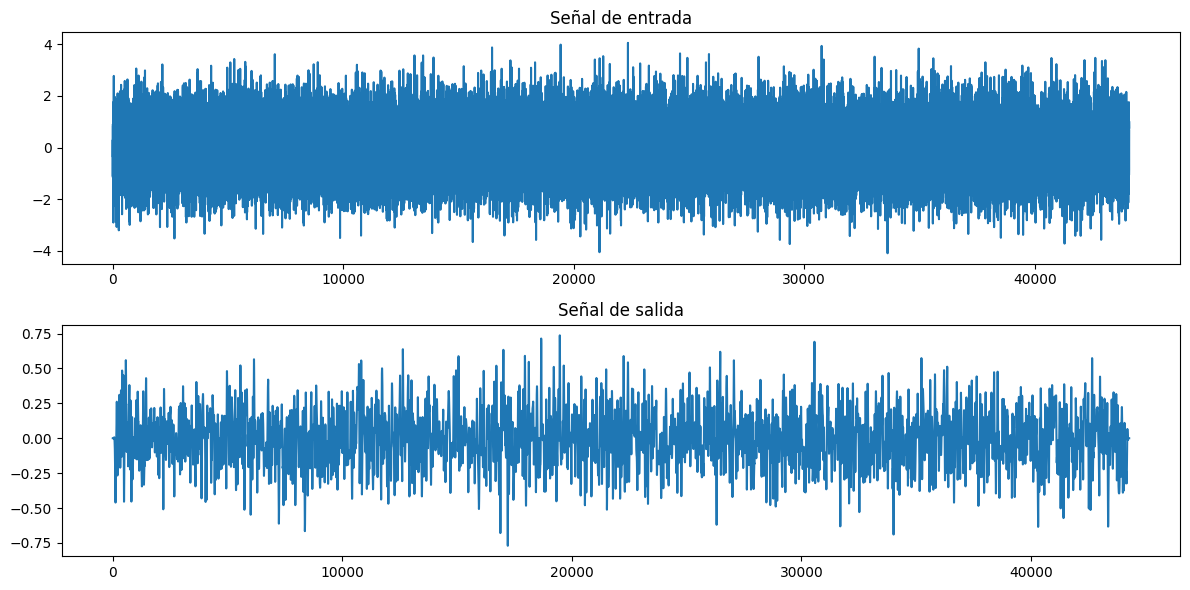

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Definir la frecuencia de corte del filtro pasa bajos
fc = 1000.0

# Calcular la respuesta al impulso del filtro pasa bajos
n = int(np.ceil((4 * fs) / fc))
t = np.arange(-n / 2, n / 2) / fs
h = np.sinc(2 * fc * t) * np.blackman(n)
h = h / np.sum(h)

# Definir la señal de entrada
x = np.random.randn(44100)

# Convolucionar la señal de entrada con la respuesta al impulso del filtro pasa bajos
y = convolve(x, h)

# Graficar la señal de entrada y la señal de salida
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Señal de entrada')
plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Señal de salida')
plt.tight_layout()
plt.show()

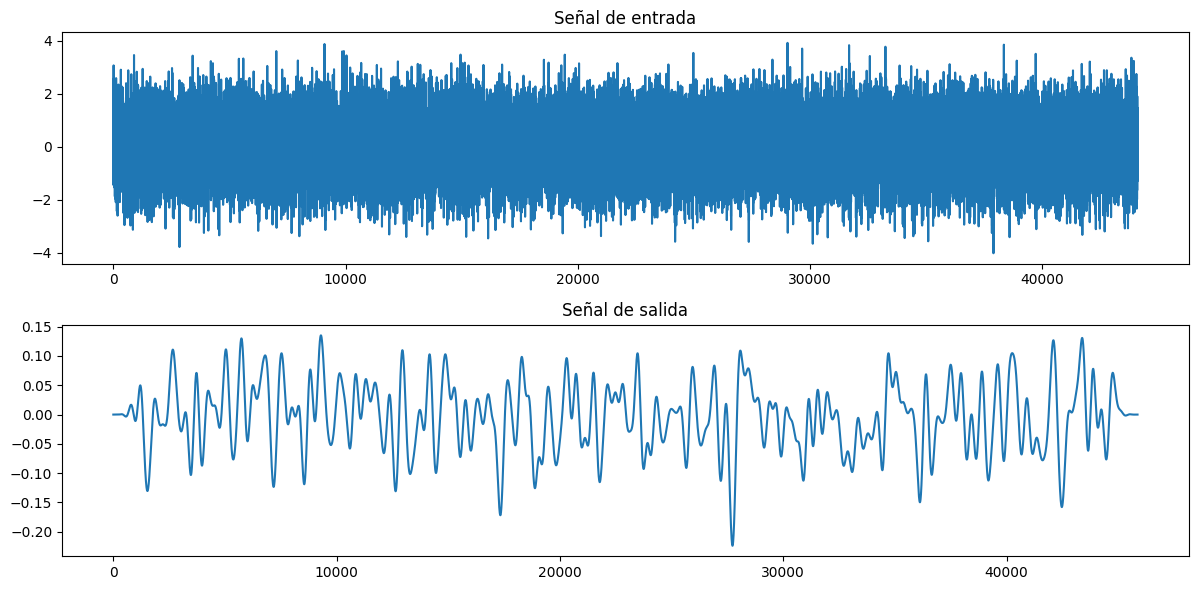

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Definir la frecuencia de corte del filtro pasa bajos
fc = 100.0

# Calcular la respuesta al impulso del filtro pasa bajos
n = int(np.ceil((4 * fs) / fc))
t = np.arange(-n / 2, n / 2) / fs
h = np.sinc(2 * fc * t) * np.blackman(n)
h = h / np.sum(h)

# Definir la señal de entrada
x = np.random.randn(44100)

# Convolucionar la señal de entrada con la respuesta al impulso del filtro pasa bajos
y = convolve(x, h)

# Graficar la señal de entrada y la señal de salida
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Señal de entrada')
plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Señal de salida')
plt.tight_layout()
plt.show()

9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899023 -0.12565271]
9
[ 0.          1.         -0.74355015  0.55286683 -0.41108421  0.30566173
 -0.22727482  0.16899

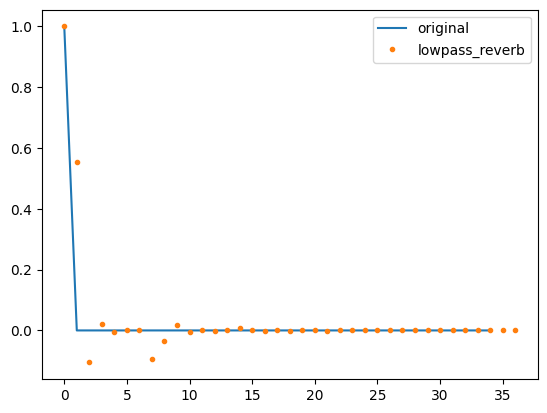

In [104]:
def low_pass_reverb(x, delay, duration):
    
    delay = int(delay) + 1
    x_new = np.append(np.zeros(delay), x)
    x_new = np.append(x_new, np.zeros(int(duration*delay)))
    y = np.zeros(len(x_new)+delay)
    for i in range(delay, len(y)):
        y[i] = x_new[i-delay] + np.convolve(y, low_pass_filter(20000), mode='same')[i-delay]
    out = y[(2*delay):]
    return out

print(low_pass_reverb(x,1,1))
plt.plot(x)
plt.plot(low_pass_reverb(x,1,1), ".")
plt.legend(['original', 'lowpass_reverb'])

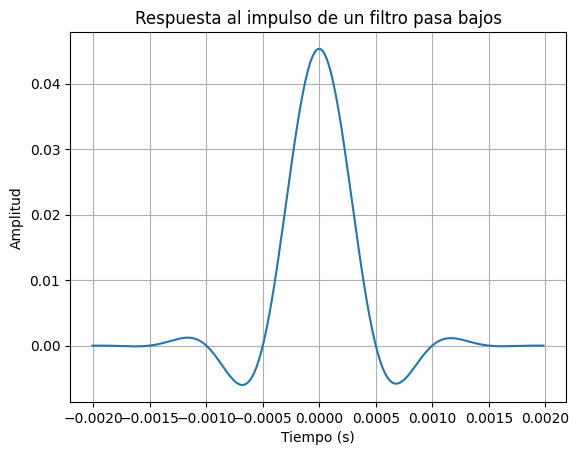

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la frecuencia de corte
fc = 1000.0

# Definir la frecuencia de muestreo
fs = 44100.0

# Calcular el número de muestras para la respuesta al impulso
n = int(np.ceil((4 * fs) / fc))

# Crear un vector de tiempo
t = np.arange(-n / 2, n / 2) / fs

# Calcular la respuesta al impulso
h = np.sinc(2 * fc * t) * np.blackman(n)

# Normalizar la respuesta al impulso
h = h / np.sum(h)

# Graficar la respuesta al impulso
plt.plot(t, h)
plt.title('Respuesta al impulso de un filtro pasa bajos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [17]:
def echo_effect(audioin ,delay_sec ,Fs ,decay):
    
    filt = np.zeros(int(delay_sec*Fs+1))
    filt[0] = 1
    filt[int(delay_sec*Fs)] = decay
    audiout = np.convolve(audioin,filt,mode='same')
    return audiout
    
print(echo_effect(x, 1, 1, 0.5) )

[1.  0.5 0.  0.  1.  0.5 0. ]


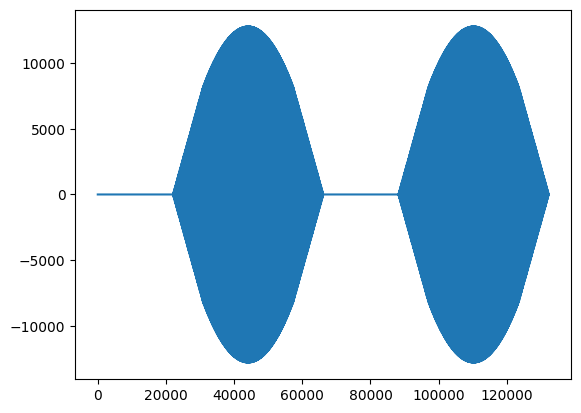

In [111]:
from pydub import AudioSegment
from pydub.generators import Sine
from IPython.display import Audio

frequency = 440
duration_s = 1  # Duración en segundos
duration_ms = duration_s * 1000  # Convertir a milisegundos

# Crear un segmento de audio de silencio
silence_duration_ms = 500  # Duración en milisegundos
silence = AudioSegment.silent(duration=silence_duration_ms)

# Crear dos señales sinusoidales
sine1 = Sine(frequency).to_audio_segment(duration=duration_ms)

silence = AudioSegment.silent(duration=silence_duration_ms)

sine2 = Sine(frequency).to_audio_segment(duration=duration_ms)

# Aplicar un efecto de desvanecimiento al inicio del sonido
fade_in_duration_ms = 800
sine1 = sine1.fade_in(fade_in_duration_ms)

# Aplicar un efecto de desvanecimiento al final del sonido
fade_duration_ms = 800
sine1 = sine1.fade_out(fade_duration_ms)

# Aplicar un efecto de desvanecimiento al inicio del sonido
sine2 = sine2.fade_in(fade_in_duration_ms)

# Aplicar un efecto de desvanecimiento al final del sonido
sine2 = sine2.fade_out(fade_duration_ms)

# Concatenar el silencio y las señales sinusoidales
tone = silence + sine1 + silence + sine2




# Guardar el tono en un archivo
tone.export("tone.wav", format="wav")

# Reproducir el archivo de audio


samples = tone.get_array_of_samples()
plt.plot(samples)
Audio("tone.wav")

In [112]:
from pydub import AudioSegment
from pydub.generators import Sine
from IPython.display import Audio
import numpy as np
import scipy.io.wavfile as wav

frequency = 440
duration_s = 2  # Duración en segundos
duration_ms = duration_s * 1000  # Convertir a milisegundos

tone = Sine(frequency).to_audio_segment(duration=duration_ms)


# Aplicar un efecto de desvanecimiento al inicio del sonido
fade_in_duration_ms = 200
tone = tone.fade_in(fade_in_duration_ms)

# Aplicar un efecto de desvanecimiento al final del sonido
fade_duration_ms = 500  # La duración del desvanecimiento es igual a la duración total del sonido
tone = tone.fade_out(fade_duration_ms)

# Acceder al arreglo de datos de audio
samples = tone.get_array_of_samples()

# Convertir a un objeto numpy.array y realizar modificaciones
# samples_np = np.array(samples, dtype=np.float32)

#la señal dura 3 segundos

samples_np = low_pass_reverb(samples, 0.5, 1)
# plt.plot(samples_np)

#reproducir el arreglo de datos de audio editado

#exporto el array como .wav

# Convertir el arreglo de numpy a int16
samples_np_int16 = (samples_np).astype(np.int16)

# Exportar el arreglo como un archivo .wav
wav.write("samples_np.wav", tone.frame_rate, samples_np_int16)

Audio(samples_np, rate=tone.frame_rate)